# Convolutional Neural Network
Elements in forward propogation in a Convolutional Neural Network 

##### Note these:
* The notebook is written in python3
* all the weights (kernel and dense) are randomly intialized inside the functions for convenience - this is not suitable for backpropogation. Only implemented for the sake of this assignment. This issue will be resolved by intializing the weights outside the scope of the functions later in the backpropogation assignment. 
* use `show_outputs=False` in `CNN` and `conv_net` functions for memory and time efficiency - matplotlib takes a lot of time and RAM to plot each activation map. May use them in `Conv2D_layer` and `pooling_layer` functions for visualization. 
* the Convolution layer and Pooling layer functions (questions 3 and 4) are implemented seperately instead of using convolution and pooling functions (questions 1 and 2) for better performance. 


## Utils

In [1]:
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt 

In [2]:
# utility functions
def relu(x):
    return np.maximum(0,x)

# numpy's tanh implementation takes care of exponent of large numbers, so scale built-in tanh to get sigmoid 
def sigmoid(x):
    return (np.tanh(x/2)+1)/2 

def tanh(x):
    return np.tanh(x)

def softmax(x):
    ex = np.exp(x)
    return ex/np.sum(ex)

def read_image(img_path):
    pix = Image.open(img_path)
    img = np.array(pix)
    return img/255.

def show_image(img):
    plt.imshow(img)
    plt.show()

## Convolution Function


A convolution function that accepts as input an image, a filter kernel, stride, padding and the non-linear function. The function must convolve the input image (after padding if specified) with the kernel (at the specified stride size) and generate an output activation after applying the specified non-linearity. Display the input image, the filter kernel and the output activation map. Ensure that your function can accept color images (i.e., a volume) and a corresponding kernel volume.


In [3]:
def conv2D(img, kernel_size, padding='valid', strides=[1,1], activation=None):
    
    if len(img.shape)==2:
        img = np.expand_dims(img, axis=-1)
    
    [H, W, channels] = img.shape
    [h,w] = kernel_size # height, width of kernel
    [sh, sw] = strides # [stride along height, stride along width]
    kernel = np.random.uniform(low=-1.0, high=1.0, size=(h,w,channels))
    if padding == 'valid':
        out_H, out_W = np.floor((H-h+sh)/sh).astype(np.int), np.floor((W-w+sw)/sw).astype(np.int)
    elif padding == 'same':
        pad_h, pad_w = np.ceil((h-sh)/2).astype(np.int), np.ceil((w-sw)/2).astype(np.int)
        out_H, out_W = np.ceil((H-h+sh+2*pad_h)/sh).astype(np.int), np.ceil((W-w+sw+2*pad_w)/sw).astype(np.int)
        img = np.pad(img, pad_width=((pad_h, pad_h+pad_h%2),(pad_w, pad_w+pad_w%2),(0,0)), mode='constant', constant_values=0) 
    out_img = np.zeros((out_H, out_W))
    for r in np.arange(0, img.shape[0]-h, sh): 
        for c in np.arange(0,img.shape[1]-w,sw): 
            out_img[r//sh][c//sw] = np.einsum('ijk,ijk' ,img[r:r+h, c:c+w, :],kernel) 
    
    activation_func = relu if activation=='relu' else sigmoid if activation=='sigmoid' else tanh if activation=='tanh' else lambda x:x
    return activation_func(out_img)

#### demo

(183, 275, 3)
(91, 137)
(92, 138)


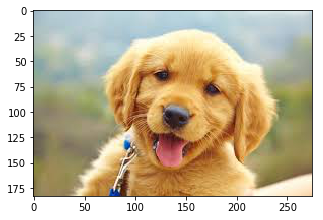

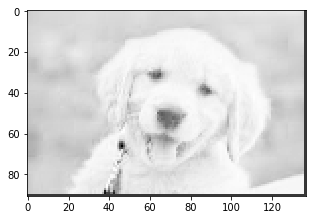

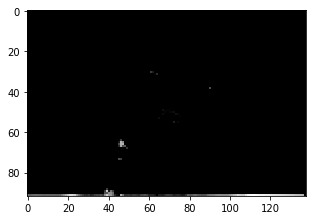

In [6]:
img = read_image(img_path='pup.jpeg')
plt.figure(1, figsize=(5,5))
plt.imshow(img)
print(img.shape)
# Example 1
out1 = conv2D(img, kernel_size=[3,3], padding='valid', strides=[2,2], activation='sigmoid')
print(out1.shape)
plt.figure(2, figsize=(5,5))
plt.imshow(out1, cmap='gray')
# Example 2
out2 = conv2D(img, kernel_size=[3,3], padding='same', strides=[2,2], activation='relu')
print(out2.shape)
plt.figure(3, figsize=(5,5))
plt.imshow(out2, cmap='gray')

plt.show()

## Pooling Function


A pooling function that accepts as input the activation map output from the convolution function and a pooling function. The function must output the appropriately pooled activation map. Display the input activation map and the pooled output.

In [7]:
def pooling(img, pool_size, padding='same', strides=[1,1], pool_type='max'):
    
    if pool_type=='max':
        pool_func=np.max
    elif pool_type=='average':
        pool_func= np.mean
        
    [H, W] = img.shape
    [h,w] = pool_size # height, width of kernel
    [sh, sw] = strides # [stride along height, stride along width]
    if padding == 'valid':
        out_H, out_W = np.floor((H-h+sh)/sh).astype(np.int), np.floor((W-w+sw)/sw).astype(np.int)
    elif padding == 'same':
        pad_h, pad_w = np.ceil((h-sh)/2).astype(np.int), np.ceil((w-sw)/2).astype(np.int)
        out_H, out_W = np.ceil((H-h+sh+2*pad_h)/sh).astype(np.int), np.ceil((W-w+sw+2*pad_w)/sw).astype(np.int)
        img = np.pad(img, pad_width=((pad_h, pad_h+pad_h%2),(pad_w, pad_w+pad_w%2)), mode='constant', constant_values=0) 
        
    out_img = np.zeros((out_H, out_W))
    for r in np.arange(0, img.shape[0]-h, sh): 
        for c in np.arange(0,img.shape[1]-w,sw): 
            out_img[r//sh][c//sw] = pool_func(img[r:r+h, c:c+w]) 
            
    return out_img

#### demo


(45, 68)
(47, 70)


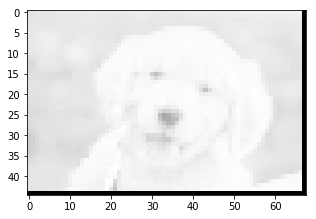

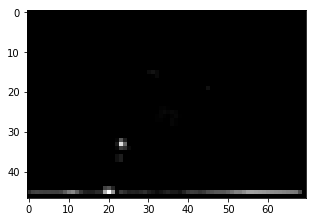

In [8]:
# Example 1
pool_out1 = pooling(out1, pool_size=[3,3], padding='valid', strides=[2,2], pool_type='max')
print(pool_out1.shape)
plt.figure(2, figsize=(5,5))
plt.imshow(pool_out1, cmap='gray')
# Example 2
pool_out2 = pooling(out2, pool_size=[3,3], padding='same', strides=[2,2], pool_type='average')
print(pool_out2.shape)
plt.figure(3, figsize=(5,5))
plt.imshow(pool_out2, cmap='gray')

plt.show()

## Convolutional Layer


A convolution layer function that accepts as input a volume (image or activation maps), filter kernels, stride, padding and the non-linear function. The function must convolve the input volume (after padding if specified) with each of the kernels (at the specified stride size) and generate an output activation volume after applying the specified non-linearity. Display the input image, the filter kernels and the output activation maps. Verify that the output of this function does indeed have the expected size (width × height × depth) as discussed in class.

In [10]:
def conv_layer(num_filters, **kwargs):
    out = []
    for _ in range(num_filters):
        out.append(conv2D(**kwargs))
    return np.asarray(out).transpose([1,2,0])

In [12]:
# a better implementation of conv layer than above
def Conv2D_layer(img, num_filters, kernel_size, padding='valid', strides=[1,1], activation=None, show_outputs=False):
    
    if len(img.shape)==2:
        img = np.expand_dims(img, axis=-1)
    
    [H, W, channels] = img.shape
    [h,w] = kernel_size # height, width of kernel
    [sh, sw] = strides # [stride along height, stride along width]
    kernel = np.random.uniform(low=-1.0, high=1.0, size=(num_filters,h,w,channels))
    # Note: this is random intialization of kernel will be done outside the scope of conv later when implementing backpropogation for training. 
    if padding == 'valid':
        out_H, out_W = np.floor((H-h+sh)/sh).astype(np.int), np.floor((W-w+sw)/sw).astype(np.int)
    elif padding == 'same':
        pad_h, pad_w = np.ceil((h-sh)/2).astype(np.int), np.ceil((w-sw)/2).astype(np.int)
        out_H, out_W = np.ceil((H-h+sh+2*pad_h)/sh).astype(np.int), np.ceil((W-w+sw+2*pad_w)/sw).astype(np.int)
        img = np.pad(img, pad_width=((pad_h, pad_h+pad_h%2),(pad_w, pad_w+pad_w%2),(0,0)), mode='constant', constant_values=0) 

    out_img = np.zeros((out_H, out_W, num_filters))
    for r in np.arange(0, img.shape[0]-h, sh): 
        for c in np.arange(0,img.shape[1]-w,sw): 
            out_img[r//sh][c//sw] = np.einsum('ijk,pijk->p' ,img[r:r+h, c:c+w, :],kernel) 
            
    activation_func = relu if activation=='relu' else sigmoid if activation=='sigmoid' else tanh if activation=='tanh' else lambda x:x
    out_img = activation_func(out_img)
    if show_outputs==True:
        for i in range(out_img.shape[2]):
            plt.figure(figsize=(5,5))
            plt.imshow(out_img[:,:,i], cmap='gray')
        plt.show()
    return out_img

#### Demo

(183, 275, 3)


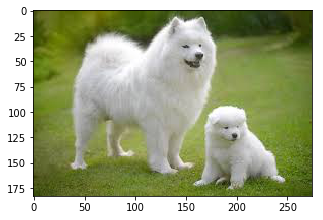

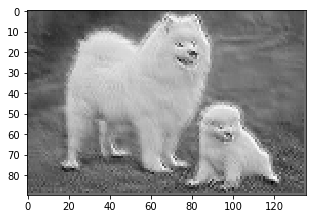

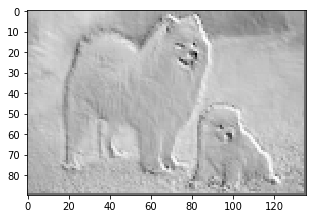

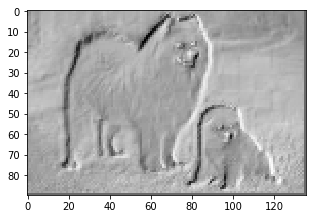

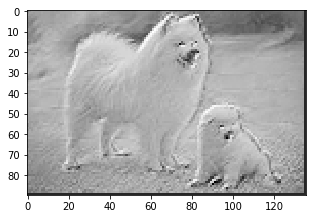

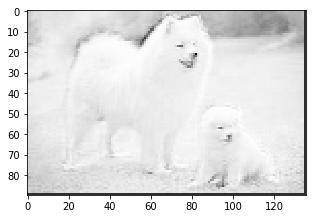

(90, 136, 5)


In [13]:
img = read_image(img_path='dogs.jpeg')
plt.figure(10, figsize=(5,5))
plt.imshow(img)
print(img.shape)

conv_layer_out = Conv2D_layer(num_filters=5, img=img, kernel_size=[5,5], padding='valid', strides=[2,2], activation='sigmoid', show_outputs=True)
print(conv_layer_out.shape)


## Pooling Volume Function


A pooling volume function that accepts as input the activation map volume, the pooling function and generates a pooled output volume. Display the input and output volumes.

In [14]:
def pooling_layer(img, pool_size, padding='valid', strides=[1,1], pool_type='max', show_outputs=False):
    
    if len(img.shape)==2:
        img = np.expand_dims(img, axis=-1)
    
    if pool_type=='max':
        pool_func=np.max
    elif pool_type=='average':
        pool_func= np.mean
    
    [H, W, channels] = img.shape
    [h,w] = pool_size # height, width of kernel
    [sh, sw] = strides # [stride along height, stride along width]
#     kernel = np.random.uniform(low=-1.0, high=1.0, size=(h,w,channels))
    kernel = np.random.randint(low=-1, high=2, size=(h,w,channels))
    if padding == 'valid':
        out_H, out_W = np.floor((H-h+sh)/sh).astype(np.int), np.floor((W-w+sw)/sw).astype(np.int)
    elif padding == 'same':
        pad_h, pad_w = np.ceil((h-sh)/2).astype(np.int), np.ceil((w-sw)/2).astype(np.int)
        out_H, out_W = np.ceil((H-h+sh+2*pad_h)/sh).astype(np.int), np.ceil((W-w+sw+2*pad_w)/sw).astype(np.int)
        img = np.pad(img, pad_width=((pad_h, pad_h),(pad_w, pad_w),(0,0)), mode='constant', constant_values=0)
    out_img = np.zeros((out_H, out_W, channels))
    for r in np.arange(0, img.shape[0]-h, sh): 
        for c in np.arange(0,img.shape[1]-w,sw): 
            out_img[r//sh][c//sw] = pool_func(img[r:r+h, c:c+w, :], axis=(0,1)) 
    if show_outputs==True:
        for i in range(out_img.shape[2]):
            plt.figure(figsize=(5,5))
            plt.imshow(out_img[:,:,i], cmap='gray')
        plt.show()
    return out_img

#### Demo


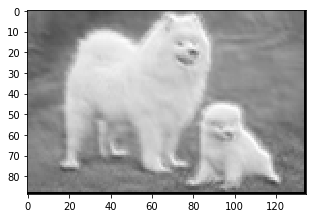

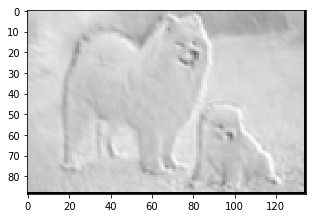

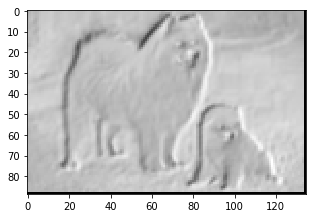

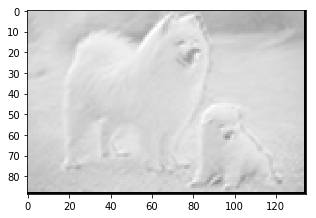

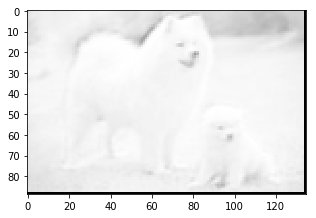

In [15]:
pool_layer_out = pooling_layer(img=conv_layer_out, pool_size=[2,2], padding='valid', strides=[1,1], pool_type='average', show_outputs=True)


## Composition of Convolution Layers


A composition of convolution layer functions that accepts as input an image volume, number of convolution layers, kernels for each layer, strides and padding for each layer, non-linearity for each layer, and the pooling function for each layer. Display the activation map generated at each of the convolution layers.

In [16]:
def conv_net(img, num_layers, num_filters, kernel_sizes, conv_strides, padding, activations, 
             pool_sizes, pool_strides, pool_types, show_outputs=False):
    assert num_layers==len(activations)==len(num_filters)==len(kernel_sizes)==len(conv_strides)==len(padding)==len(pool_sizes)==len(pool_strides)==len(pool_types), \
    'invalid input - length of each list of inputs should be same as num_layers'
    z = img
    for n in range(num_layers):
        print('convolution layer:', n+1)
        out = Conv2D_layer(
            img=z,
            num_filters=num_filters[n],
            kernel_size=kernel_sizes[n],
            padding=padding[n],
            strides=conv_strides[n],
            activation=activations[n],
            show_outputs=show_outputs
        )
        print('pooling layer:', n+1)
        z = pooling_layer(
            img=out,
            pool_size=pool_sizes[n],
            padding=padding[n],
            strides=pool_strides[n],
            pool_type=pool_types[n],
            show_outputs=show_outputs
        )
    return z    

(183, 275, 3)
convolution layer: 1
pooling layer: 1
convolution layer: 2
pooling layer: 2
convolution layer: 3
pooling layer: 3
convolution layer: 4
pooling layer: 4
(91, 137, 8)


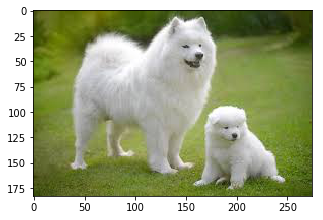

In [18]:
img = read_image(img_path='dogs.jpeg')
plt.figure(10, figsize=(5,5))
plt.imshow(img)
print(img.shape)

conv_net_output = conv_net(
    img=img,
    num_layers=4,
    num_filters=[32,32,16,8],
    kernel_sizes=[[3,3], [5,5], [3,3], [5,5]],
    conv_strides=[[1,1], [2,2], [1,1], [1,1]],
    padding=['same', 'valid', 'same', 'same'],
    activations=['relu', 'relu', 'relu', 'tanh'],
    pool_sizes=[[2,2], [2,2], [2,2], [2,2]],
    pool_strides=[[1,1], [1,1], [1,1], [1,1]],
    pool_types=['max', 'max', 'average', 'average'],
    show_outputs=False # use show_outputs=False for efficiency 
)
print(conv_net_output.shape)


## Unraveling Function


An unraveling function that accepts as input the activation map volume output by the pooling layer and generates a vector of a specified size. It is important to note that this function has a weight matrix associated with it whose size is chosen such that the input and desired output sizes are matched.

In [19]:
def unravel(activation_map, mlp_input_dim):
    x_flat = np.reshape(activation_map, newshape=(-1))
    weights = np.random.normal(0, 0.01, size=(mlp_input_dim, len(x_flat)))
    
    return np.matmul(weights, x_flat)

In [20]:
x = unravel(conv_net_output, mlp_input_dim=1024)
print(x.shape)

(1024,)


## Multilayer Perceptron


A multilayer perceptron (MLP) function that accepts as input a vector, the number of hidden layers, the size of each hidden layer, the non-linear function, and the size of the output layer. This function should generate an output vector of the specified size. Generate the output with and without the softmax function applied to the output layer. 


In [21]:
def mlp_layer(x, out_dim, activation=None):
    func = relu if activation=='relu' else sigmoid if activation=='sigmoid' else tanh if activation=='tanh' else lambda x:x

    weights, biases = np.random.normal(scale=0.01, size=(out_dim, len(x))), np.random.normal(scale=0.01, size=out_dim)
    return func(np.matmul(weights, x)+biases)
    

def mlp(x, num_hidden, hidden_dims, output_dim, mlp_activations):
    assert num_hidden==len(hidden_dims), 'invalid inputs'
    # list of activation functions for each layer
    z = x
    for n in range(num_hidden):
        z = mlp_layer(z, out_dim=hidden_dims[n], activation=mlp_activations[n])
    out = mlp_layer(z, out_dim=output_dim, activation=None)
    return out, softmax(out)
    
    

In [22]:
y, softmax_y = mlp(x, num_hidden=3, hidden_dims=[500,400,900], output_dim=20, mlp_activations=['relu', 'tanh', 'sigmoid'])

print(y, softmax_y)


[ 0.09071479  0.15554111  0.23035243  0.14624888 -0.06079667 -0.12161875
 -0.09978201 -0.3329686  -0.0418113  -0.07699877  0.00135723 -0.15947737
  0.02582671  0.04263746 -0.05711914 -0.13528066 -0.14246125 -0.24995213
  0.29589958  0.03694796] [0.0553492  0.05905614 0.06364367 0.05850992 0.04756755 0.04476062
 0.0457488  0.03623331 0.04847926 0.04680307 0.05061787 0.04309772
 0.05187174 0.05275112 0.0477428  0.04415326 0.04383735 0.03936966
 0.06795509 0.05245184]


## CNN - forward propogation


Finally, connect the composition of convolution layer functions to the MLP function via the unraveling function to complete the
forward path of a CNN. This function should generate an output vector for a given input image volume.

In [23]:
def CNN(image, **kwargs):
    conv_kwargs = dict(list(kwargs.items())[:10]) # 10 arguments for conv_net, one of them is img
    unravel_kwargs = dict(list(kwargs.items())[10:11])
    mlp_kwargs = dict(list(kwargs.items())[11:])
    
    z = conv_net(image, **conv_kwargs)
    x = unravel(z, **unravel_kwargs)
    y = mlp(x, **mlp_kwargs)
    return y
    

In [24]:
CNN_dict = {
    'num_layers' : 4,
    'num_filters' : [32,32,16,8],
    'kernel_sizes' : [[3,3], [5,5], [3,3], [5,5]],
    'conv_strides' : [[1,1], [2,2], [2,2], [2,2]],
    'padding' : ['valid', 'valid', 'valid', 'valid'],
    'activations' : ['relu', 'tanh', 'tanh', 'sigmoid'],
    'pool_sizes' : [[2,2], [2,2], [2,2], [3,3]],
    'pool_strides' : [[1,1], [1,1], [2,2], [2,2]],
    'pool_types': ['max', 'max', 'average', 'average'],
    'show_outputs': False, # use show_outputs=True to visualize outputs of Convolution layers and pooling layers
    'mlp_input_dim': int(4096),
    'num_hidden' : 3,
    'hidden_dims' : [1024, 256, 256],
    'output_dim' : 5,
    'mlp_activations' : ['relu', 'tanh', 'sigmoid']
           }

img = read_image('dogs.jpeg')
y, y_soft = CNN(img, **CNN_dict)
print(y, y_soft)

convolution layer: 1
pooling layer: 1
convolution layer: 2
pooling layer: 2
convolution layer: 3
pooling layer: 3
convolution layer: 4
pooling layer: 4
[ 0.08687774 -0.11063374 -0.00660057 -0.01109122  0.02988365] [0.21820696 0.17909789 0.19873369 0.19784324 0.20611822]
